In [1]:
import numpy as np
from matplotlib.image import imread, imsave
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
from skimage import color

In [2]:
image_raw = imread("./image.jpeg")
print(image_raw.shape)

plt.figure(figsize=[12,8])
# plt.imshow(image_raw)

(1024, 1024, 3)


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [3]:
img = color.rgb2gray(imread('image.jpeg'))
plt.figure(figsize=[12,8])
# plt.imshow(img)


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

k for 98% variance: 36


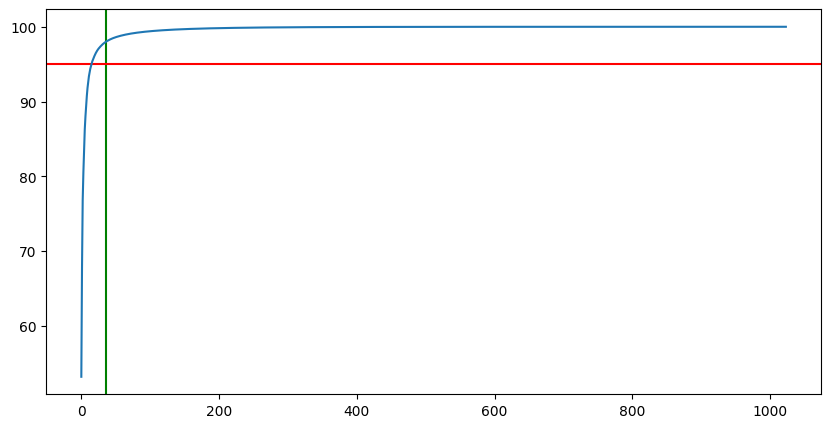

In [4]:
pca = PCA()
pca.fit(img)

variance = np.cumsum(pca.explained_variance_ratio_)*100

# Calculating the number of components needed to preserve 98% of the data
k = np.argmax(variance>98)
print("k for 98% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.axvline(x=k, color="g")
plt.axhline(y=95, color="r")
ax = plt.plot(variance)

In [5]:
ipca = IncrementalPCA(n_components=k)
image_compressed = ipca.inverse_transform(ipca.fit_transform(img))

imsave('./pca_ghyb.jpeg', image_compressed)

# Plotting the compressed image
plt.figure(figsize=[12,8])
# plt.imshow(image_compressed)

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [6]:
import os
og = (os.stat('./image.jpeg').st_size/1024)
mod = (os.stat('./pca_ghyb.jpeg').st_size/1024)

In [8]:
print(og//mod)

8.0


In [10]:
import cv2
import numpy as np

def calculate_mse(image1, image2):
    # Calculate the Mean Squared Error (MSE) between two images
    mse = np.mean((image1 - image2) ** 2)
    return mse

def calculate_psnr(image1, image2):
    # Calculate the Peak Signal-to-Noise Ratio (PSNR) between two images
    mse = calculate_mse(image1, image2)
    max_pixel = 255.0  # Assuming pixel values range from 0 to 255
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Example usage
image1 = cv2.imread("./image.jpeg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("./pca_ghyb.jpeg", cv2.IMREAD_GRAYSCALE)

mse = calculate_mse(image1, image2)
psnr = calculate_psnr(image1, image2)

print("Mean Squared Error (MSE):", mse)
print("Peak Signal-to-Noise Ratio (PSNR):", psnr)


Mean Squared Error (MSE): 108.36390781402588
Peak Signal-to-Noise Ratio (PSNR): 27.781957027176855
